In [1]:
import numpy as np
import matplotlib.pyplot as plt  # For plotting the cities and the route

In [2]:
class TSP:
    def __init__(self, num_cities, coordinations_range=(0, 10_000)):
        self.num_cities = num_cities
        self.coordinations_range = coordinations_range

        # Step 1: Generate random city coordinates
        self.cities_coordinates = self._generate_random_coordinates_city()

        # Step 2: Create the distance matrix
        self.distance_matrix = self._compute_distance_matrix()

        # Step 3: Normalize distance matrix
        self.normalized_distance_matrix = self._normalize_distance_matrix()

    def _generate_random_coordinates_city(self):
        """Generate random (x, y) coordinates for the cities"""
        return np.random.randint(
            self.coordinations_range[0],
            self.coordinations_range[1],
            size=(self.num_cities, 2)
        )

    def _euclidean_distance(self, coordinate_x, coordinate_y):
        """Compute Euclidean distance between two points"""
        return np.linalg.norm(coordinate_x - coordinate_y)

    def _compute_distance_matrix(self):
        """Create a symmetric matrix of Euclidean distances between cities"""
        matrix = np.zeros((self.num_cities, self.num_cities))
        for i in range(self.num_cities):
            for j in range(i + 1, self.num_cities):
                distance = self._euclidean_distance(
                    self.cities_coordinates[i], self.cities_coordinates[j]
                )
                matrix[i][j] = matrix[j][i] = distance
        return matrix

    def _normalize_distance_matrix(self):
        """Normalize the distance matrix values between 0 and 1"""
        max_distance = np.max(self.distance_matrix)
        return self.distance_matrix / max_distance if max_distance != 0 else self.distance_matrix

    def normalize_city_coords(self):
        """Normalize city coordinates to range [0, 1] (optional)"""
        max_value = np.amax(self.cities_coordinates, axis=0)
        return self.cities_coordinates / max_value

    def plot_cities(self):
        """Visualize city locations on a 2D plot"""
        plt.figure(figsize=(10, 10))
        plt.scatter(self.cities_coordinates[:, 0], self.cities_coordinates[:, 1], 
                    c='blue', s=100, label="Cities")
        for i, (x, y) in enumerate(self.cities_coordinates):
            plt.text(x + 5, y + 5, str(i), fontsize=12, fontweight='bold')
        plt.title(f"{self.num_cities} Random Cities", fontsize=14)
        plt.xlabel("X Coordinate", fontsize=12)
        plt.ylabel("Y Coordinate", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(fontsize=12)
        plt.show()

    def calculate_route_distance(self, route):
        """Calculate total distance of a given TSP route"""
        total_distance = 0
        for i in range(len(route) - 1):
            total_distance += self.distance_matrix[route[i]][route[i + 1]]
        # Return to starting city
        total_distance += self.distance_matrix[route[-1]][route[0]]
        return total_distance

    def plot_route(self, route):
        """Visualize the route taken through the cities"""
        plt.figure(figsize=(10, 10))
        plt.scatter(self.cities_coordinates[:, 0], self.cities_coordinates[:, 1], 
                    c='blue', s=100, label="Cities")
        route_coords = self.cities_coordinates[route]
        route_coords = np.vstack([route_coords, route_coords[0]])  # Close the loop
        plt.plot(route_coords[:, 0], route_coords[:, 1], 'r-', linewidth=2, label="Route")
        for i, (x, y) in enumerate(self.cities_coordinates):
            plt.text(x + 5, y + 5, str(i), fontsize=12, fontweight='bold')
        total_distance = self.calculate_route_distance(route)
        plt.title(f"TSP Route (Total Distance: {total_distance:.2f})", fontsize=14)
        plt.xlabel("X Coordinate", fontsize=12)
        plt.ylabel("Y Coordinate", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(fontsize=12)
        plt.show()

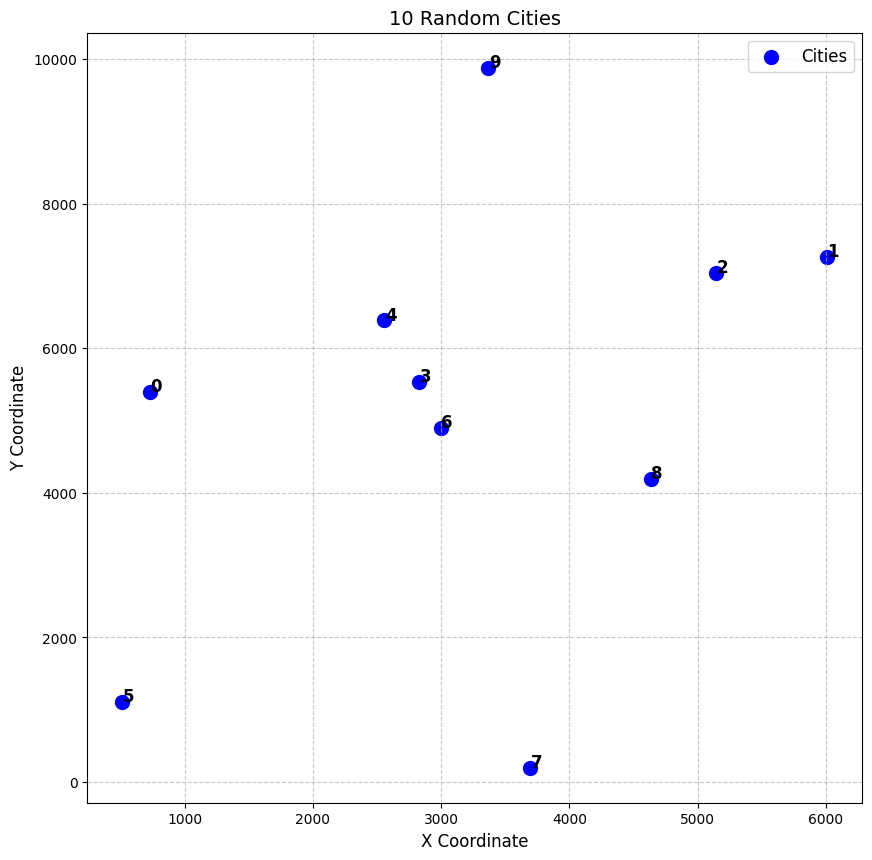

In [3]:
tsp = TSP(num_cities=10)  # You can change this number
tsp.plot_cities()

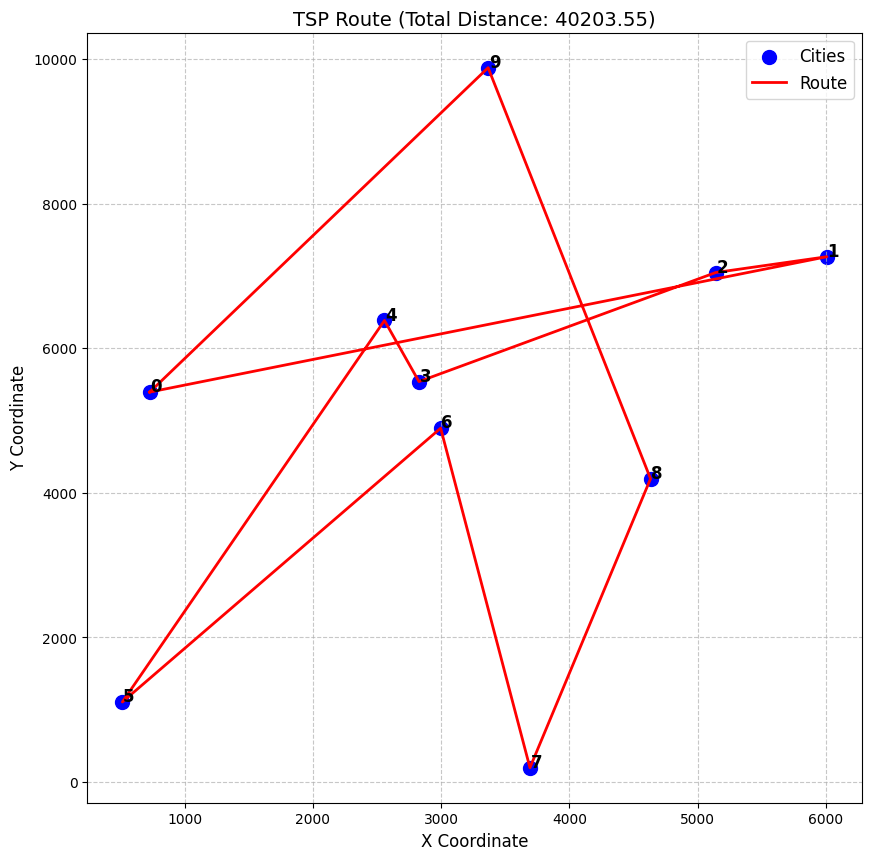

In [4]:
# Example: A route visiting cities in order (0 → 1 → 2 → ... → 9)
sample_route = list(range(10))
tsp.plot_route(sample_route)